# Series de Taylor

El Teorema de Taylor y su fórmula, la serie de Taylor, es de gran valor en el estudio de los métodos numéricos.


## Definición

La serie de Taylor, también conocida como polinomio de Taylor, es una representación de una función en términos de una **suma infinita de términos**. Estos términos se derivan a partir de las derivadas de la función en un punto específico, $x_a$:

$$ T[f(x),x_a]=\sum_{i=0}^{\infty} \frac{f^{(i)}(x_a)}{i!}\, (x-x_a)^i $$


## Aplicación de Taylor

Permite predecir el valor de la función predecir el valor de una función en un punto en términos del valor de la función y sus derivadas en otro punto

$$ f(x_{i+1}) ≈ f(x_i) $$

Esta es la aproximación de orden cero. Asume que el valor futuro debe ser similar al valor anterior al estar proximos entre si.

Si sabemos que no es constate la función, la ecuación anterior debe mejorarcer por lo que pasamos a la aproximación de primer orden:

$$ f(x_{i+1}) ≈ f(x_i) + f'(x_i)(x_{i+1} -x_i) $$

Dado que el nuevo término es una línea recta, ahora podemos predecir un incremento o decremento lineal de la función en un futuro proximo ($x_{i+1}$)

Cuando el cambio de la función no es lineal debemos incorporar un segundo término al orden para representar la curvatura de la función:


$$ f(x_{i+1}) ≈ f(x_i) + f'(x_i)(x_{i+1} -x_i) + \frac{ f''(x_i)}{2!}(x_i)(x_{i+1} -x_i)^2 $$

y así sucesivamente hasta representar adecuadamente el cámbio.




## Solución numérica y aproximación

El desarrollo de Taylor es una serie infinita de potencias que **busca representar una función en un cierto intervalo**. Sin embargo, debido a que en la práctica no se puede trabajar con series infinitas, se realiza una **aproximación utilizando $n$ términos**. Esta aproximación es conocida como la **serie de Taylor truncada**, $T_n$:

$ T_n[f(x),x_a]=\sum_{i=0}^{n} \frac{f^{(i)}(x_a)}{i!}\, (x-x_a)^i $


## Error de truncamiento

El error de truncamiento surge debido a la **diferencia** entre la solución numérica obtenida con la **serie de Taylor y la solución exacta de la función**. Al truncar la serie de Taylor después del término de orden N, obtenemos:

$$
   T_n[f(x),x_a]=f(x_a) + (x-x_a) f^{'}(x_a)+ \frac{(x-x_a)^{2}}{2} f^{''}(x_a)+
     \frac{(x-x_a)^{3}}{6} f^{'''}(x_a)+ \frac{(x-x_a)^4}{24} f^{''''}(x_a)+ ... +
      \frac{(x-x_a)^n}{n!} f^{N}(x_a)+ 0((x-x_a)^{n+1})
   $$

  
   Donde el último término lo podemos definir de forma integral como el residuo de orden $n$:

   $$R_n = \int_{a}^{x} \frac{(x-t)^n}{n!}f^{(n+1)}(t)dt$$

Donde $t$ es una variable muda. De acuerdo al segundo teorema del valor medio el residuo lo podemos reescribir como:

$$R_n =\frac{f^{(n+1)}(\xi)}{(n+1)!}(x-x_a)^{n+1}$$

Que es tambien conocida como derivada del residuo ((para ver mas detalle ver Chapra cap 4 pag 64))
Este residuo o error **se origina específicamente del truncamiento de la serie**.


Una forma comun de representar la serie de Taylor es definiendo el incremento del paso ($x-x_a$) como $h$
$$
   f(x)=f(x_a) + h f^{'}(x_a)+ \frac{h^{2}}{2} f^{''}(x_a)+
     \frac{h^{3}}{6} f^{'''}(x_a)+ \frac{h^4}{24} f^{''''}(x_a)+ ... +
      \frac{h^n}{n!} f^{n}(x_a)+ \frac{f^{(n+1)}(\xi)}{(n+1)!}h^{n+1} )
   $$



## Ejemplo del Aproximacion de Taylor

A continuación, muestro un ejemplo que aproxima la función seno ($sin(x)$) usando polinomios de Taylor de diferentes órdenes.

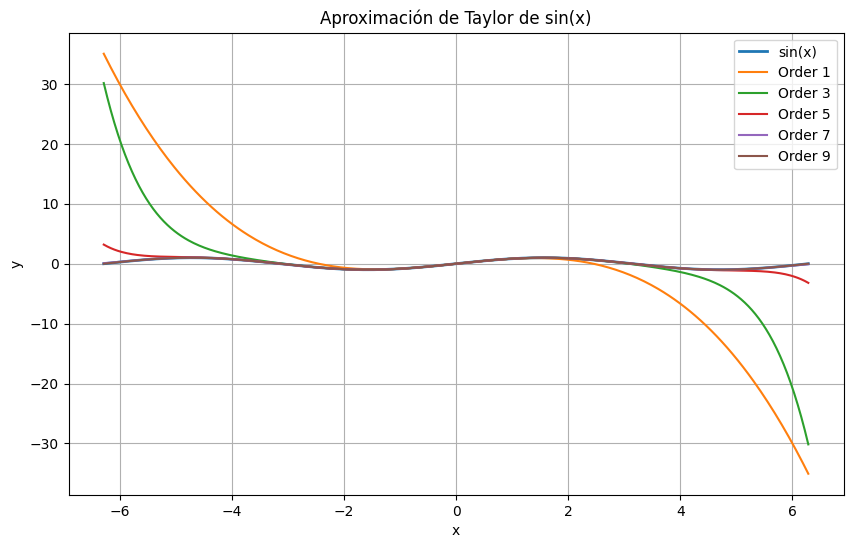

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Función para calcular el término n del polinomio de Taylor para sin(x)
def taylor_term(n, x):
    return ((-1)**n * x**(2*n + 1)) / math.factorial(2*n + 1)

# Función para aproximar sin(x) usando un polinomio de Taylor de orden 'order'
def taylor_approximation(order, x):
    return sum(taylor_term(n, x) for n in range(order + 1))

# Valores de x donde se evaluarán las funciones
x_values = np.linspace(-2*np.pi, 2*np.pi, 400)
y_values = np.sin(x_values)

# Gráfico de la función real sin(x)
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='sin(x)', linewidth=2)

# Gráfico de las aproximaciones de Taylor de diferentes órdenes
for order in [1, 3, 5, 7, 9]:
    y_approx = [taylor_approximation(order, x) for x in x_values]
    plt.plot(x_values, y_approx, label=f'Order {order}')

# Configuración del gráfico
plt.title('Aproximación de Taylor de sin(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()


## Desarrollo de Taylor para funciones unidimensionales

- Una función es considerada analítica en $x =x_a$ si $f(x)$ puede representarse mediante una serie de potencias en términos de $h = x-x_a$ dentro de un radio de convergencia.
- La condición para que una función sea analítica es que todas sus derivadas sean continuas.
- Un punto singular es aquel en el que $f(x)$ no es analítica (por ejemplo, tan($\pi/2$)).
- Si el valor de $x_a$ es 0, el polinomio es referido como polinomio de Maclaurin.


## Ejercicio

A continuación, se presentan algunas actividades relacionadas con el polinomio de Taylor y la función seno:

1. Calcular el polinomio de Taylor de grado 5 que se ajusta a la función seno en el punto $\pi/2$.
2. Estimar el error que se comete al comparar el valor real de la función con un polinomio de Taylor de grado 2 y uno de grado 5.
3. Calcular el polinomio de Taylor de grado 6 para la función seno centrado en 0.
4. Graficar en Python la función seno y los polinomios de Taylor de grados 0, 1, 2, 3, 4, y 5 en torno a 0 y $\pi$ y centrado en $\pi/2$.
5. Analizar y discutir los resultados obtenidos en la gráfica.
